# Control Group - Full Pipeline

### Steps:

1. Load Control Group
2. Split Data (train, test)
2. Transform Variables
    * Normalize
    * Coordinate Transform: lat, lon -> x,y,z
    * Circular Transform: doy -> radians
3. Apply ML Models

In [377]:
import sys
import numpy as np
sys.path.insert(0, '/home/emmanuel/projects/2020_ml_ocn/ml4ocean/src')

from data.make_dataset import DataLoad
from features.build_features import times_2_cycles, geo_2_cartesian

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Step I - Load Data

In [380]:
dataloader = DataLoad()

X, y = dataloader.load_control_data('na')

X = X[dataloader.core_vars + dataloader.loc_vars]
y = y.drop(dataloader.meta_vars, axis=1)

X.shape

(3022, 11)

### Step II - Coordinate Transform: lat, lon -> x, y, z

In [381]:
X = geo_2_cartesian(X)
X.describe()

,sla,PAR,RHO_WN_412,RHO_WN_443,RHO_WN_490,RHO_WN_555,RHO_WN_670,MLD,doy,x,y,z
count,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000
mean,-1.023435,42.587315,0.017911,0.015458,0.013138,0.006466,0.000970,92.319656,165.976837,0.424498,-0.278527,0.803373
std,6.241974,13.341398,0.010524,0.007983,0.005180,0.002834,0.000447,145.681095,69.581352,0.166646,0.175314,0.195811
min,-47.530300,7.658160,0.000789,0.001000,0.001829,0.002191,0.000004,10.000000,1.000000,0.102689,-0.723914,0.121478
25%,-4.710750,33.493225,0.010973,0.010070,0.010000,0.004785,0.000662,20.000000,116.000000,0.333212,-0.409115,0.806248
50%,-1.061400,44.568950,0.014952,0.013515,0.012166,0.005929,0.000991,40.000000,161.000000,0.396892,-0.284740,0.869006
75%,2.866325,53.848125,0.021841,0.018442,0.015337,0.007369,0.001151,82.000000,218.000000,0.475388,-0.174620,0.905730
max,29.168600,63.337100,0.063060,0.052012,0.053483,0.036277,0.005287,995.000000,366.000000,0.896169,0.080525,0.980676


### Step III - DOY Transform: doy -> sin, cos

In [374]:
times = ['doy']
X = times_2_cycles(X, times)
X.describe()

,sla,PAR,RHO_WN_412,RHO_WN_443,RHO_WN_490,RHO_WN_555,RHO_WN_670,MLD,lat,lon,doy_sin,doy_cos
count,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000,3022.000000
mean,-1.023435,42.587315,0.017911,0.015458,0.013138,0.006466,0.000970,92.319656,56.252418,-31.638079,0.158825,-0.450884
std,6.241974,13.341398,0.010524,0.007983,0.005180,0.002834,0.000447,145.681095,15.925331,19.597311,0.695279,0.536955
min,-47.530300,7.658160,0.000789,0.001000,0.001829,0.002191,0.000004,10.000000,6.977381,-69.448892,-0.999991,-0.999963
25%,-4.710750,33.493225,0.010973,0.010070,0.010000,0.004785,0.000662,20.000000,53.730976,-46.425321,-0.530730,-0.882048
50%,-1.061400,44.568950,0.014952,0.013515,0.012166,0.005929,0.000991,40.000000,60.343318,-32.953007,0.313107,-0.618671
75%,2.866325,53.848125,0.021841,0.018442,0.015337,0.007369,0.001151,82.000000,64.921750,-21.808543,0.826354,-0.200891
max,29.168600,63.337100,0.063060,0.052012,0.053483,0.036277,0.005287,995.000000,78.718000,13.466999,0.999991,1.000000


### Step IV - Log Transform, y

In [281]:
y_log = np.log(y)

### PCA Transform Spectrum

In [ ]:
def pcaspectrum(df: pd.DataFrame, n_components=2)-> pd.DataFrame:
    cols = ['RHO_WN_412', 'RHO_WN_443', 'RHO_WN_490', 'RHO_WN_555', 'RHO_WN_670']
    
    # cartesian coordinates
    dat = 
    df['doy_sin'] = np.sin(df['doy'] * const)
    df['doy_cos'] = np.cos(df['doy'] * const)

    df = df.drop(['doy'], axis=1)

    return df

In [ ]:
X = X.drop(columns=[''])

### Step V - Train Test

In [333]:
from sklearn.model_selection import train_test_split


random_state = 123
train_size = 0.8

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, train_size=train_size, random_state=random_state
)

### Step VI - Normalize Data

In [334]:
from sklearn.preprocessing import StandardScaler, Normalizer

# Normalize inputs 
x_transformer = StandardScaler(with_mean=True, with_std=True)
# x_transformer = Normalizer(norm='max')

x_= x_transformer.fit_transform(xtrain[dataloader.core_vars])
xt_ = x_transformer.transform(xtest[dataloader.core_vars])

xtrain_norm = xtrain.copy()
xtrain_norm.loc[:, dataloader.core_vars] = x_.copy()
xtest_norm = xtest.copy()
xtest_norm.loc[:, dataloader.core_vars] = xt_

# Normalize Outputs
y_transformer = StandardScaler(with_mean=True, with_std=True)

ytrain_norm = y_transformer.fit_transform(ytrain)
ytest_norm = y_transformer.transform(ytest)

In [335]:
xtrain_norm.describe()

,sla,PAR,RHO_WN_412,RHO_WN_443,RHO_WN_490,RHO_WN_555,RHO_WN_670,MLD,x,y,z,doy_sin,doy_cos
count,2.417000e+03,2.417000e+03,2.417000e+03,2.417000e+03,2.417000e+03,2.417000e+03,2.417000e+03,2.417000e+03,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,2.939771e-17,1.763863e-16,1.844707e-16,-7.349428e-18,8.194613e-17,3.200676e-16,-7.275934e-17,-1.028920e-17,0.424668,-0.278311,0.802300,0.162112,-0.450827
std,1.000207e+00,1.000207e+00,1.000207e+00,1.000207e+00,1.000207e+00,1.000207e+00,1.000207e+00,1.000207e+00,0.169281,0.174764,0.198385,0.691962,0.540354
min,-7.501530e+00,-2.618699e+00,-1.603063e+00,-1.810242e+00,-2.185176e+00,-1.496467e+00,-2.109669e+00,-5.717526e-01,0.102689,-0.723914,0.121478,-0.999917,-0.999963
25%,-5.928906e-01,-6.813858e-01,-6.667658e-01,-6.769751e-01,-6.115840e-01,-5.894988e-01,-6.857377e-01,-5.021861e-01,0.333006,-0.408946,0.805980,-0.530730,-0.882048
50%,-7.542058e-03,1.489009e-01,-2.818125e-01,-2.498437e-01,-1.932039e-01,-1.973898e-01,4.633771e-02,-3.630529e-01,0.397430,-0.281836,0.870650,0.313107,-0.632103
75%,6.130681e-01,8.411333e-01,3.705666e-01,3.675926e-01,4.162261e-01,3.096330e-01,3.792305e-01,-7.087329e-02,0.475318,-0.175071,0.906204,0.826354,-0.200891
max,4.853472e+00,1.550250e+00,4.262432e+00,3.937427e+00,6.513550e+00,1.024603e+01,9.612993e+00,6.197075e+00,0.896169,0.080525,0.980244,0.999991,0.999852


### Step VII - ML Models

#### Random Forest Regression

In [349]:
import time
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(
    bootstrap=True, criterion='mse', max_depth=500,
    max_features=4, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_impurity_split=None,
    min_samples_leaf=1, min_samples_split=4,
    min_weight_fraction_leaf=0.0, n_estimators=1_000,
    n_jobs=-1, oob_score=False, random_state=123, verbose=0,
    warm_start=False
)
t0 = time.time()
rf_model.fit(xtrain_norm, ytrain_norm)
t1 = time.time() - t0

print(
    f"Training Time: {t1:.3f} seconds"
)

Training Time: 6.434 seconds


In [350]:
# Predictions
t0 = time.time()
ypred_red = rf_model.predict(xtest_norm)
t1 = time.time() - t0
#ypred = pca_model.inverse_transform(ypred_red)


In [351]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Get Average Stats
mae = mean_absolute_error(ytest_norm, ypred_red, multioutput='uniform_average')
mse = mean_squared_error(ytest_norm, ypred_red, multioutput='uniform_average')
rmse = np.sqrt(mse)
r2 = r2_score(ytest_norm, ypred_red, multioutput='uniform_average')
print(
    f"MAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nR2: {r2:.3f}" 
    f" \nTime: {t1:.3} seconds"
)

MAE: 0.428
MSE: 0.422
RMSE: 0.650
R2: 0.509 
Time: 1.04 seconds


In [352]:
# Get Stats per Depth
mae_raw = mean_absolute_error(ytest_norm, ypred_red, multioutput='raw_values')
mse_raw = mean_squared_error(ytest_norm, ypred_red, multioutput='raw_values')
rmse_raw = np.sqrt(mse_raw)
r2_raw = r2_score(ytest_norm, ypred_red, multioutput='raw_values')

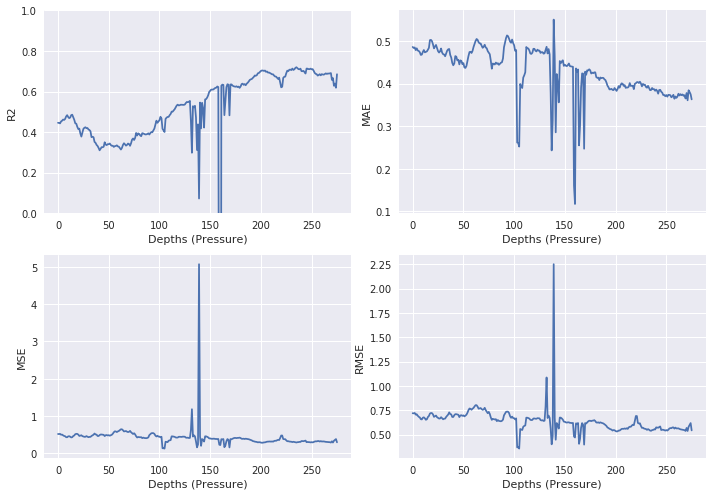

In [353]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# R2 Values
ax[0,0].plot(r2_raw)
ax[0,0].set_xlabel('Depths (Pressure)')
ax[0,0].set_ylabel('R2')
ax[0,0].set_ylim([0, 1])

# MAE
ax[0,1].plot(mae_raw)
ax[0,1].set_xlabel('Depths (Pressure)')
ax[0,1].set_ylabel('MAE')

# MSE
ax[1,0].plot(mse_raw)
ax[1,0].set_xlabel('Depths (Pressure)')
ax[1,0].set_ylabel('MSE')

# RMSE
ax[1,1].plot(rmse_raw)
ax[1,1].set_xlabel('Depths (Pressure)')
ax[1,1].set_ylabel('RMSE')


plt.tight_layout()
plt.show()

Feature ranking:
1. feature y (0.237342)
2. feature x (0.164044)
3. feature z (0.149442)
4. feature sla (0.066097)
5. feature doy_sin (0.053342)
6. feature MLD (0.046882)
7. feature RHO_WN_412 (0.043175)
8. feature PAR (0.042507)
9. feature doy_cos (0.042225)
10. feature RHO_WN_555 (0.041439)
11. feature RHO_WN_670 (0.038894)
12. feature RHO_WN_490 (0.037619)
13. feature RHO_WN_443 (0.036991)


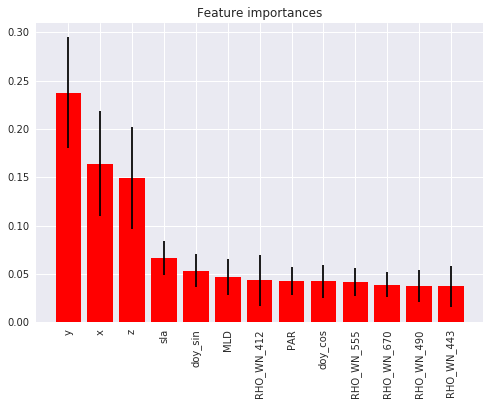

In [354]:
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# get label indices
labels = [xtest_norm.columns.tolist()[i] for i in indices]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, labels[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

### RF w. Bagging

In [314]:
from sklearn.ensemble import BaggingRegressor

In [315]:
import time
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(
    bootstrap=True, criterion='mse', max_depth=500,
    max_features=4, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_impurity_split=None,
    min_samples_leaf=1, min_samples_split=4,
    min_weight_fraction_leaf=0.0, n_estimators=1_000,
    n_jobs=-1, oob_score=False, random_state=123, verbose=0,
    warm_start=False
)
bagged_rf_model = BaggingRegressor(
    base_estimator=rf_model, 
)
t0 = time.time()
bagged_rf_model.fit(xtrain_norm, ytrain_norm)
t1 = time.time() - t0

print(
    f"Training Time: {t1:.3f} seconds"
)

Training Time: 65.893 seconds


In [317]:
# Predictions
t0 = time.time()
ypred_red = bagged_rf_model.predict(xtest_norm)
t1 = time.time() - t0
#ypred = pca_model.inverse_transform(ypred_red)


In [318]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Get Average Stats
mae = mean_absolute_error(ytest_norm, ypred_red, multioutput='uniform_average')
mse = mean_squared_error(ytest_norm, ypred_red, multioutput='uniform_average')
rmse = np.sqrt(mse)
r2 = r2_score(ytest_norm, ypred_red, multioutput='uniform_average')
print(
    f"MAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nR2: {r2:.3f}" 
    f" \nTime: {t1:.3} seconds"
)

MAE: 0.647
MSE: 0.751
RMSE: 0.867
R2: 0.239 
Time: 6.11 seconds


In [319]:
# Get Stats per Depth
mae_raw = mean_absolute_error(ytest_norm, ypred_red, multioutput='raw_values')
mse_raw = mean_squared_error(ytest_norm, ypred_red, multioutput='raw_values')
rmse_raw = np.sqrt(mse_raw)
r2_raw = r2_score(ytest_norm, ypred_red, multioutput='raw_values')

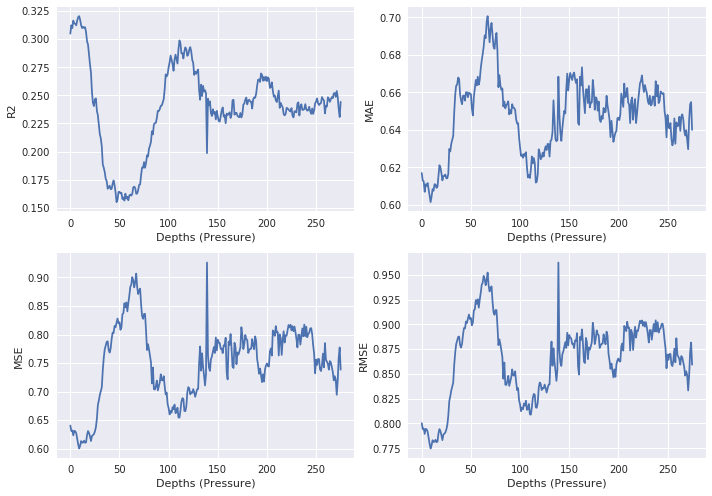

In [320]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# R2 Values
ax[0,0].plot(r2_raw)
ax[0,0].set_xlabel('Depths (Pressure)')
ax[0,0].set_ylabel('R2')

# MAE
ax[0,1].plot(mae_raw)
ax[0,1].set_xlabel('Depths (Pressure)')
ax[0,1].set_ylabel('MAE')

# MSE
ax[1,0].plot(mse_raw)
ax[1,0].set_xlabel('Depths (Pressure)')
ax[1,0].set_ylabel('MSE')

# RMSE
ax[1,1].plot(rmse_raw)
ax[1,1].set_xlabel('Depths (Pressure)')
ax[1,1].set_ylabel('RMSE')


plt.tight_layout()
plt.show()

### XGBoost

In [291]:
import xgboost
from xgboost import plot_importance

In [292]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor


xgbm_model = xgboost.XGBRFRegressor(
    n_estimators=500,
    random_state=123,
)

gbm_model_mo = MultiOutputRegressor(
    xgbm_model,
    n_jobs=-1
)
t0 = time.time()
gbm_model_mo.fit(xtrain_norm, ytrain_norm)
t1 = time.time() - t0

print(
    f"Training Time: {t1:.3f} seconds"
)

Training Time: 16.831 seconds


In [293]:
# Predictions
t0 = time.time()
ypred_red = gbm_model_mo.predict(xtest_norm)
t1 = time.time() - t0
#ypred = pca_model.inverse_transform(ypred_red)


In [294]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Get Average Stats
mae = mean_absolute_error(ytest_norm, ypred_red, multioutput='uniform_average')
mse = mean_squared_error(ytest_norm, ypred_red, multioutput='uniform_average')
rmse = np.sqrt(mse)
r2 = r2_score(ytest_norm, ypred_red, multioutput='uniform_average')
print(
    f"MAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nR2: {r2:.3f}" 
    f" \nTime: {t1:.3} seconds"
)

MAE: 0.600
MSE: 0.659
RMSE: 0.812
R2: 0.329 
Time: 0.846 seconds
